In [2]:
import pandas as pd 
from sklearn import svm, metrics, tree, ensemble
from sklearn.model_selection import  train_test_split 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [17]:
total_csv = pd.read_csv("mp_Concat_0831.csv")
total_data = pd.DataFrame(total_csv).drop(["Unnamed: 0"], axis=1)

In [18]:
data_shuffled = total_data.sample(frac=1)  # row 전체 shuffle
data_shuffled = total_data.sample(frac=1).reset_index(drop=True)  # shuffling하고 index reset
data_shuffled = data_shuffled.dropna()

In [20]:
pose_data = data_shuffled[["E_len", "S_len", "ESC", "LES", "RES", "NS"]]
pose_label = data_shuffled["labels"]

In [21]:
train_data, test_data , train_label, test_label  =  train_test_split(pose_data, pose_label, test_size=0.2, random_state=1)

In [22]:
scaler = StandardScaler()
base_model = svm.SVC(kernel='rbf')
pipe = Pipeline([('scaler', scaler), ('base_model', base_model)])

0.8730158730158731
Pipeline(steps=[('scaler', StandardScaler()),
                ('base_model', SVC(C=10, gamma=1))])
학습 결과 0.95
테스트 결과 0.8920634920634921


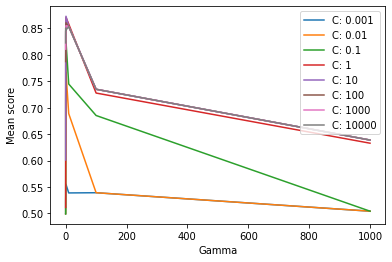

In [23]:
parameters = {'base_model__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
          'base_model__gamma': [0.0001, 0.001, 0.01, 1, 10, 100, 1000]}
# grid search Part
grid = GridSearchCV(estimator=pipe, param_grid=parameters, cv=5, n_jobs=-1)
grid.fit(train_data, train_label)

# grid search 결과 출력
print(grid.best_score_)
print(grid.best_estimator_)
print("학습 결과", grid.score(train_data, train_label))
print("테스트 결과", grid.score(test_data, test_label))

#시각화
scores = grid.cv_results_['mean_test_score']
scores = np.array(scores).reshape(len(parameters['base_model__C']), len(parameters['base_model__gamma']))
for ind, i in enumerate(parameters['base_model__C']):
    plt.plot(parameters['base_model__gamma'], scores[ind], label='C: ' + str(i))
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Mean score')
plt.show()

0.8718253968253968
Pipeline(steps=[('scaler', StandardScaler()),
                ('base_model', SVC(C=2, gamma=2))])
학습 결과 0.9503968253968254
테스트 결과 0.8873015873015873


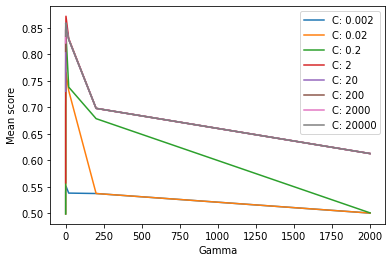

In [24]:
parameters2 = {'base_model__C': [0.002, 0.02, 0.2, 2, 20, 200, 2000, 20000],
          'base_model__gamma': [0.0002, 0.002, 0.02, 2, 20, 200, 2000]}
# grid search Part
grid2 = GridSearchCV(estimator=pipe, param_grid=parameters2, cv=5, n_jobs=-1)
grid2.fit(train_data, train_label)

# grid search 결과 출력
print(grid2.best_score_)
print(grid2.best_estimator_)
print("학습 결과", grid2.score(train_data, train_label))
print("테스트 결과", grid2.score(test_data, test_label))

#시각화
scores2 = grid2.cv_results_['mean_test_score']
scores2 = np.array(scores2).reshape(len(parameters2['base_model__C']), len(parameters2['base_model__gamma']))
for ind, i in enumerate(parameters2['base_model__C']):
    plt.plot(parameters2['base_model__gamma'], scores2[ind], label='C: ' + str(i))
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Mean score')
plt.show()

0.8623015873015873
Pipeline(steps=[('scaler', StandardScaler()),
                ('base_model', SVC(C=30000, gamma=0.03))])
학습 결과 0.9091269841269841
테스트 결과 0.8698412698412699


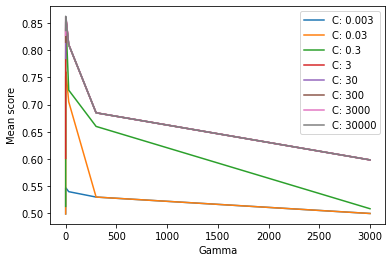

In [25]:
parameters3 = {'base_model__C': [0.003, 0.03, 0.3, 3, 30, 300, 3000, 30000],
          'base_model__gamma': [0.0003, 0.003, 0.03, 3, 30, 300, 3000]}
# grid search Part
grid3 = GridSearchCV(estimator=pipe, param_grid=parameters3, cv=5, n_jobs=-1)
grid3.fit(train_data, train_label)

# grid search 결과 출력
print(grid3.best_score_)
print(grid3.best_estimator_)
print("학습 결과", grid3.score(train_data, train_label))
print("테스트 결과", grid3.score(test_data, test_label))

#시각화
scores3 = grid3.cv_results_['mean_test_score']
scores3 = np.array(scores3).reshape(len(parameters3['base_model__C']), len(parameters3['base_model__gamma']))
for ind, i in enumerate(parameters3['base_model__C']):
    plt.plot(parameters3['base_model__gamma'], scores3[ind], label='C: ' + str(i))
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Mean score')
plt.show()

0.869047619047619
Pipeline(steps=[('scaler', StandardScaler()),
                ('base_model', SVC(C=40000, gamma=0.04))])
학습 결과 0.915079365079365
테스트 결과 0.861904761904762


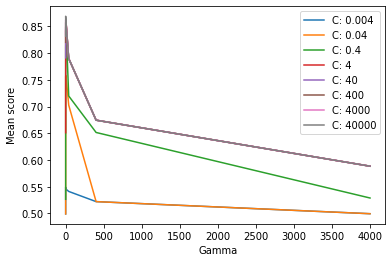

In [26]:
parameters4 = {'base_model__C': [0.004, 0.04, 0.4, 4, 40, 400, 4000, 40000],
          'base_model__gamma': [0.0004, 0.004, 0.04, 4, 40, 400, 4000]}
# grid search Part
grid4 = GridSearchCV(estimator=pipe, param_grid=parameters4, cv=5, n_jobs=-1)
grid4.fit(train_data, train_label)

# grid search 결과 출력
print(grid4.best_score_)
print(grid4.best_estimator_)
print("학습 결과", grid4.score(train_data, train_label))
print("테스트 결과", grid4.score(test_data, test_label))

#시각화
scores4 = grid4.cv_results_['mean_test_score']
scores4 = np.array(scores4).reshape(len(parameters4['base_model__C']), len(parameters4['base_model__gamma']))
for ind, i in enumerate(parameters4['base_model__C']):
    plt.plot(parameters4['base_model__gamma'], scores4[ind], label='C: ' + str(i))
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Mean score')
plt.show()

0.865079365079365
Pipeline(steps=[('scaler', StandardScaler()),
                ('base_model', SVC(C=50000, gamma=0.05))])
학습 결과 0.9198412698412698
테스트 결과 0.8666666666666667


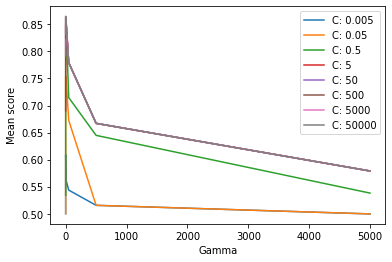

In [27]:
parameters5 = {'base_model__C': [0.005, 0.05, 0.5, 5, 50, 500, 5000, 50000],
          'base_model__gamma': [0.0005, 0.005, 0.05, 5, 50, 500, 5000]}
# grid search Part
grid5 = GridSearchCV(estimator=pipe, param_grid=parameters5, cv=5, n_jobs=-1)
grid5.fit(train_data, train_label)

# grid search 결과 출력
print(grid5.best_score_)
print(grid5.best_estimator_)
print("학습 결과", grid5.score(train_data, train_label))
print("테스트 결과", grid5.score(test_data, test_label))

#시각화
scores5 = grid5.cv_results_['mean_test_score']
scores5 = np.array(scores5).reshape(len(parameters5['base_model__C']), len(parameters5['base_model__gamma']))
for ind, i in enumerate(parameters5['base_model__C']):
    plt.plot(parameters5['base_model__gamma'], scores5[ind], label='C: ' + str(i))
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Mean score')
plt.show()

0.8682539682539684
Pipeline(steps=[('scaler', StandardScaler()),
                ('base_model', SVC(C=6000, gamma=0.06))])
학습 결과 0.915079365079365
테스트 결과 0.8714285714285714


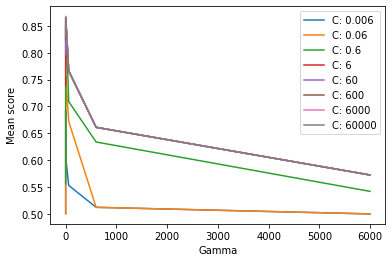

In [28]:
parameters6 = {'base_model__C': [0.006, 0.06, 0.6, 6, 60, 600, 6000, 60000],
          'base_model__gamma': [0.0006, 0.006, 0.06, 6, 60, 600, 6000]}
# grid search Part
grid6 = GridSearchCV(estimator=pipe, param_grid=parameters6, cv=5, n_jobs=-1)
grid6.fit(train_data, train_label)

# grid search 결과 출력
print(grid6.best_score_)
print(grid6.best_estimator_)
print("학습 결과", grid6.score(train_data, train_label))
print("테스트 결과", grid6.score(test_data, test_label))

#시각화
scores6 = grid6.cv_results_['mean_test_score']
scores6 = np.array(scores6).reshape(len(parameters6['base_model__C']), len(parameters6['base_model__gamma']))
for ind, i in enumerate(parameters6['base_model__C']):
    plt.plot(parameters6['base_model__gamma'], scores6[ind], label='C: ' + str(i))
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Mean score')
plt.show()

0.8706349206349208
Pipeline(steps=[('scaler', StandardScaler()),
                ('base_model', SVC(C=7000, gamma=0.07))])
학습 결과 0.9186507936507936
테스트 결과 0.873015873015873


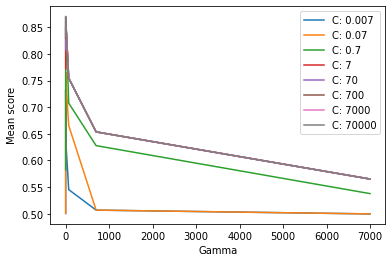

In [29]:
parameters7 = {'base_model__C': [0.007, 0.07, 0.7, 7, 70, 700, 7000, 70000],
          'base_model__gamma': [0.0007, 0.007, 0.07, 7, 70, 700, 7000]}
# grid search Part
grid7 = GridSearchCV(estimator=pipe, param_grid=parameters7, cv=5, n_jobs=-1)
grid7.fit(train_data, train_label)

# grid search 결과 출력
print(grid7.best_score_)
print(grid7.best_estimator_)
print("학습 결과", grid7.score(train_data, train_label))
print("테스트 결과", grid7.score(test_data, test_label))

#시각화
scores7 = grid7.cv_results_['mean_test_score']
scores7 = np.array(scores7).reshape(len(parameters7['base_model__C']), len(parameters7['base_model__gamma']))
for ind, i in enumerate(parameters7['base_model__C']):
    plt.plot(parameters7['base_model__gamma'], scores7[ind], label='C: ' + str(i))
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Mean score')
plt.show()

0.8702380952380953
Pipeline(steps=[('scaler', StandardScaler()),
                ('base_model', SVC(C=800, gamma=0.08))])
학습 결과 0.9154761904761904
테스트 결과 0.8698412698412699


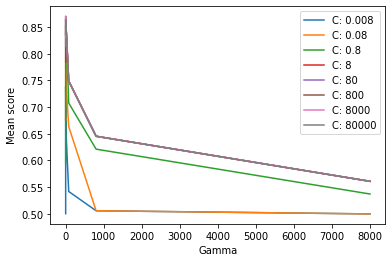

In [30]:
parameters8 = {'base_model__C': [0.008, 0.08, 0.8, 8, 80, 800, 8000, 80000],
          'base_model__gamma': [0.0008, 0.008, 0.08, 8, 80, 800, 8000]}
# grid search Part
grid8 = GridSearchCV(estimator=pipe, param_grid=parameters8, cv=5, n_jobs=-1)
grid8.fit(train_data, train_label)

# grid search 결과 출력
print(grid8.best_score_)
print(grid8.best_estimator_)
print("학습 결과", grid8.score(train_data, train_label))
print("테스트 결과", grid8.score(test_data, test_label))

#시각화
scores8 = grid8.cv_results_['mean_test_score']
scores8 = np.array(scores8).reshape(len(parameters8['base_model__C']), len(parameters8['base_model__gamma']))
for ind, i in enumerate(parameters8['base_model__C']):
    plt.plot(parameters8['base_model__gamma'], scores8[ind], label='C: ' + str(i))
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Mean score')
plt.show()

0.8726190476190476
Pipeline(steps=[('scaler', StandardScaler()),
                ('base_model', SVC(C=900, gamma=0.09))])
학습 결과 0.9182539682539682
테스트 결과 0.8698412698412699


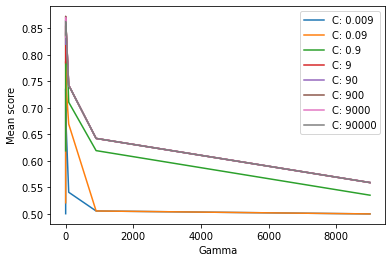

In [31]:
parameters9 = {'base_model__C': [0.009, 0.09, 0.9, 9, 90, 900, 9000, 90000],
          'base_model__gamma': [0.0009, 0.009, 0.09, 9, 90, 900, 9000]}
# grid search Part
grid9 = GridSearchCV(estimator=pipe, param_grid=parameters9, cv=5, n_jobs=-1)
grid9.fit(train_data, train_label)

# grid search 결과 출력
print(grid9.best_score_)
print(grid9.best_estimator_)
print("학습 결과", grid9.score(train_data, train_label))
print("테스트 결과", grid9.score(test_data, test_label))

#시각화
scores9 = grid9.cv_results_['mean_test_score']
scores9 = np.array(scores9).reshape(len(parameters9['base_model__C']), len(parameters9['base_model__gamma']))
for ind, i in enumerate(parameters9['base_model__C']):
    plt.plot(parameters9['base_model__gamma'], scores9[ind], label='C: ' + str(i))
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Mean score')
plt.show()

0.9469960397952285
Pipeline(steps=[('scaler', StandardScaler()),
                ('base_model', SVC(C=4, gamma=2))])
학습 결과 0.9784102060843964
테스트 결과 0.9490196078431372


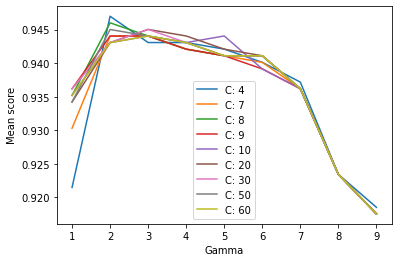

In [16]:
parameters_extra = {'base_model__C': [4, 7, 8, 9, 10, 20, 30, 50 ,60],
          'base_model__gamma': [1, 2, 3, 4, 5, 6, 7, 8, 9]}
# grid search Part
grid_extra = GridSearchCV(estimator=pipe, param_grid=parameters_extra, cv=5, n_jobs=-1)
grid_extra.fit(train_data, train_label)

# grid search 결과 출력
print(grid_extra.best_score_)
print(grid_extra.best_estimator_)
print("학습 결과", grid_extra.score(train_data, train_label))
print("테스트 결과", grid_extra.score(test_data, test_label))

#시각화
scores_extra = grid_extra.cv_results_['mean_test_score']
scores_extra = np.array(scores_extra).reshape(len(parameters_extra['base_model__C']), len(parameters_extra['base_model__gamma']))
for ind, i in enumerate(parameters_extra['base_model__C']):
    plt.plot(parameters_extra['base_model__gamma'], scores_extra[ind], label='C: ' + str(i))
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Mean score')
plt.show()

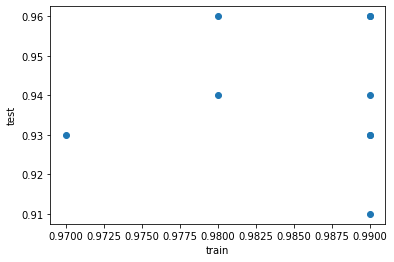

In [11]:
x = [0.97, 0.98, 0.99, 0.98, 0.99, 0.99, 0.99, 0.99, 0.99]
y = [0.93, 0.96, 0.96, 0.94, 0.96, 0.94, 0.93, 0.93, 0.91]

plt.scatter(x, y)
plt.xlabel('train')
plt.ylabel('test')
plt.show()